In [1]:
# dataset
from google.cloud import bigquery
from google.oauth2 import service_account

# maths and eda
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

# viz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

credentials = service_account.Credentials.from_service_account_file('../credentials')
# Initialize the BigQuery client
client = bigquery.Client(credentials=credentials)

In [12]:
# query data
QUERY = ("""SELECT * FROM `portfoliodata-428314.kaggle.pumpkin_seeds`""")
query_job = client.query(QUERY)
pumpkin = query_job.result().to_dataframe()
pumpkin.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,69843,1026.683,408.7731,218.3650,70810,298.2061,0.8454,0.9863,0.6400,0.8326,1.8720,0.7295,Çerçevelik
1,67306,998.616,375.0199,229.2614,68240,292.7399,0.7914,0.9863,0.6897,0.8481,1.6358,0.7806,Çerçevelik
2,81013,1109.727,425.0978,244.3291,82136,321.1681,0.8183,0.9863,0.6917,0.8267,1.7399,0.7555,Çerçevelik
3,73326,1048.647,408.7890,229.6360,74342,305.5512,0.8273,0.9863,0.7165,0.8379,1.7802,0.7475,Çerçevelik
4,79754,1132.588,459.8052,222.0332,80858,318.6627,0.8757,0.9863,0.6748,0.7813,2.0709,0.6930,Çerçevelik


# EDA

In [13]:
# mushrooms_profile = ProfileReport(mushrooms, title="Report")
# mushrooms_profile

In [14]:
pumpkin.Class.value_counts()

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64

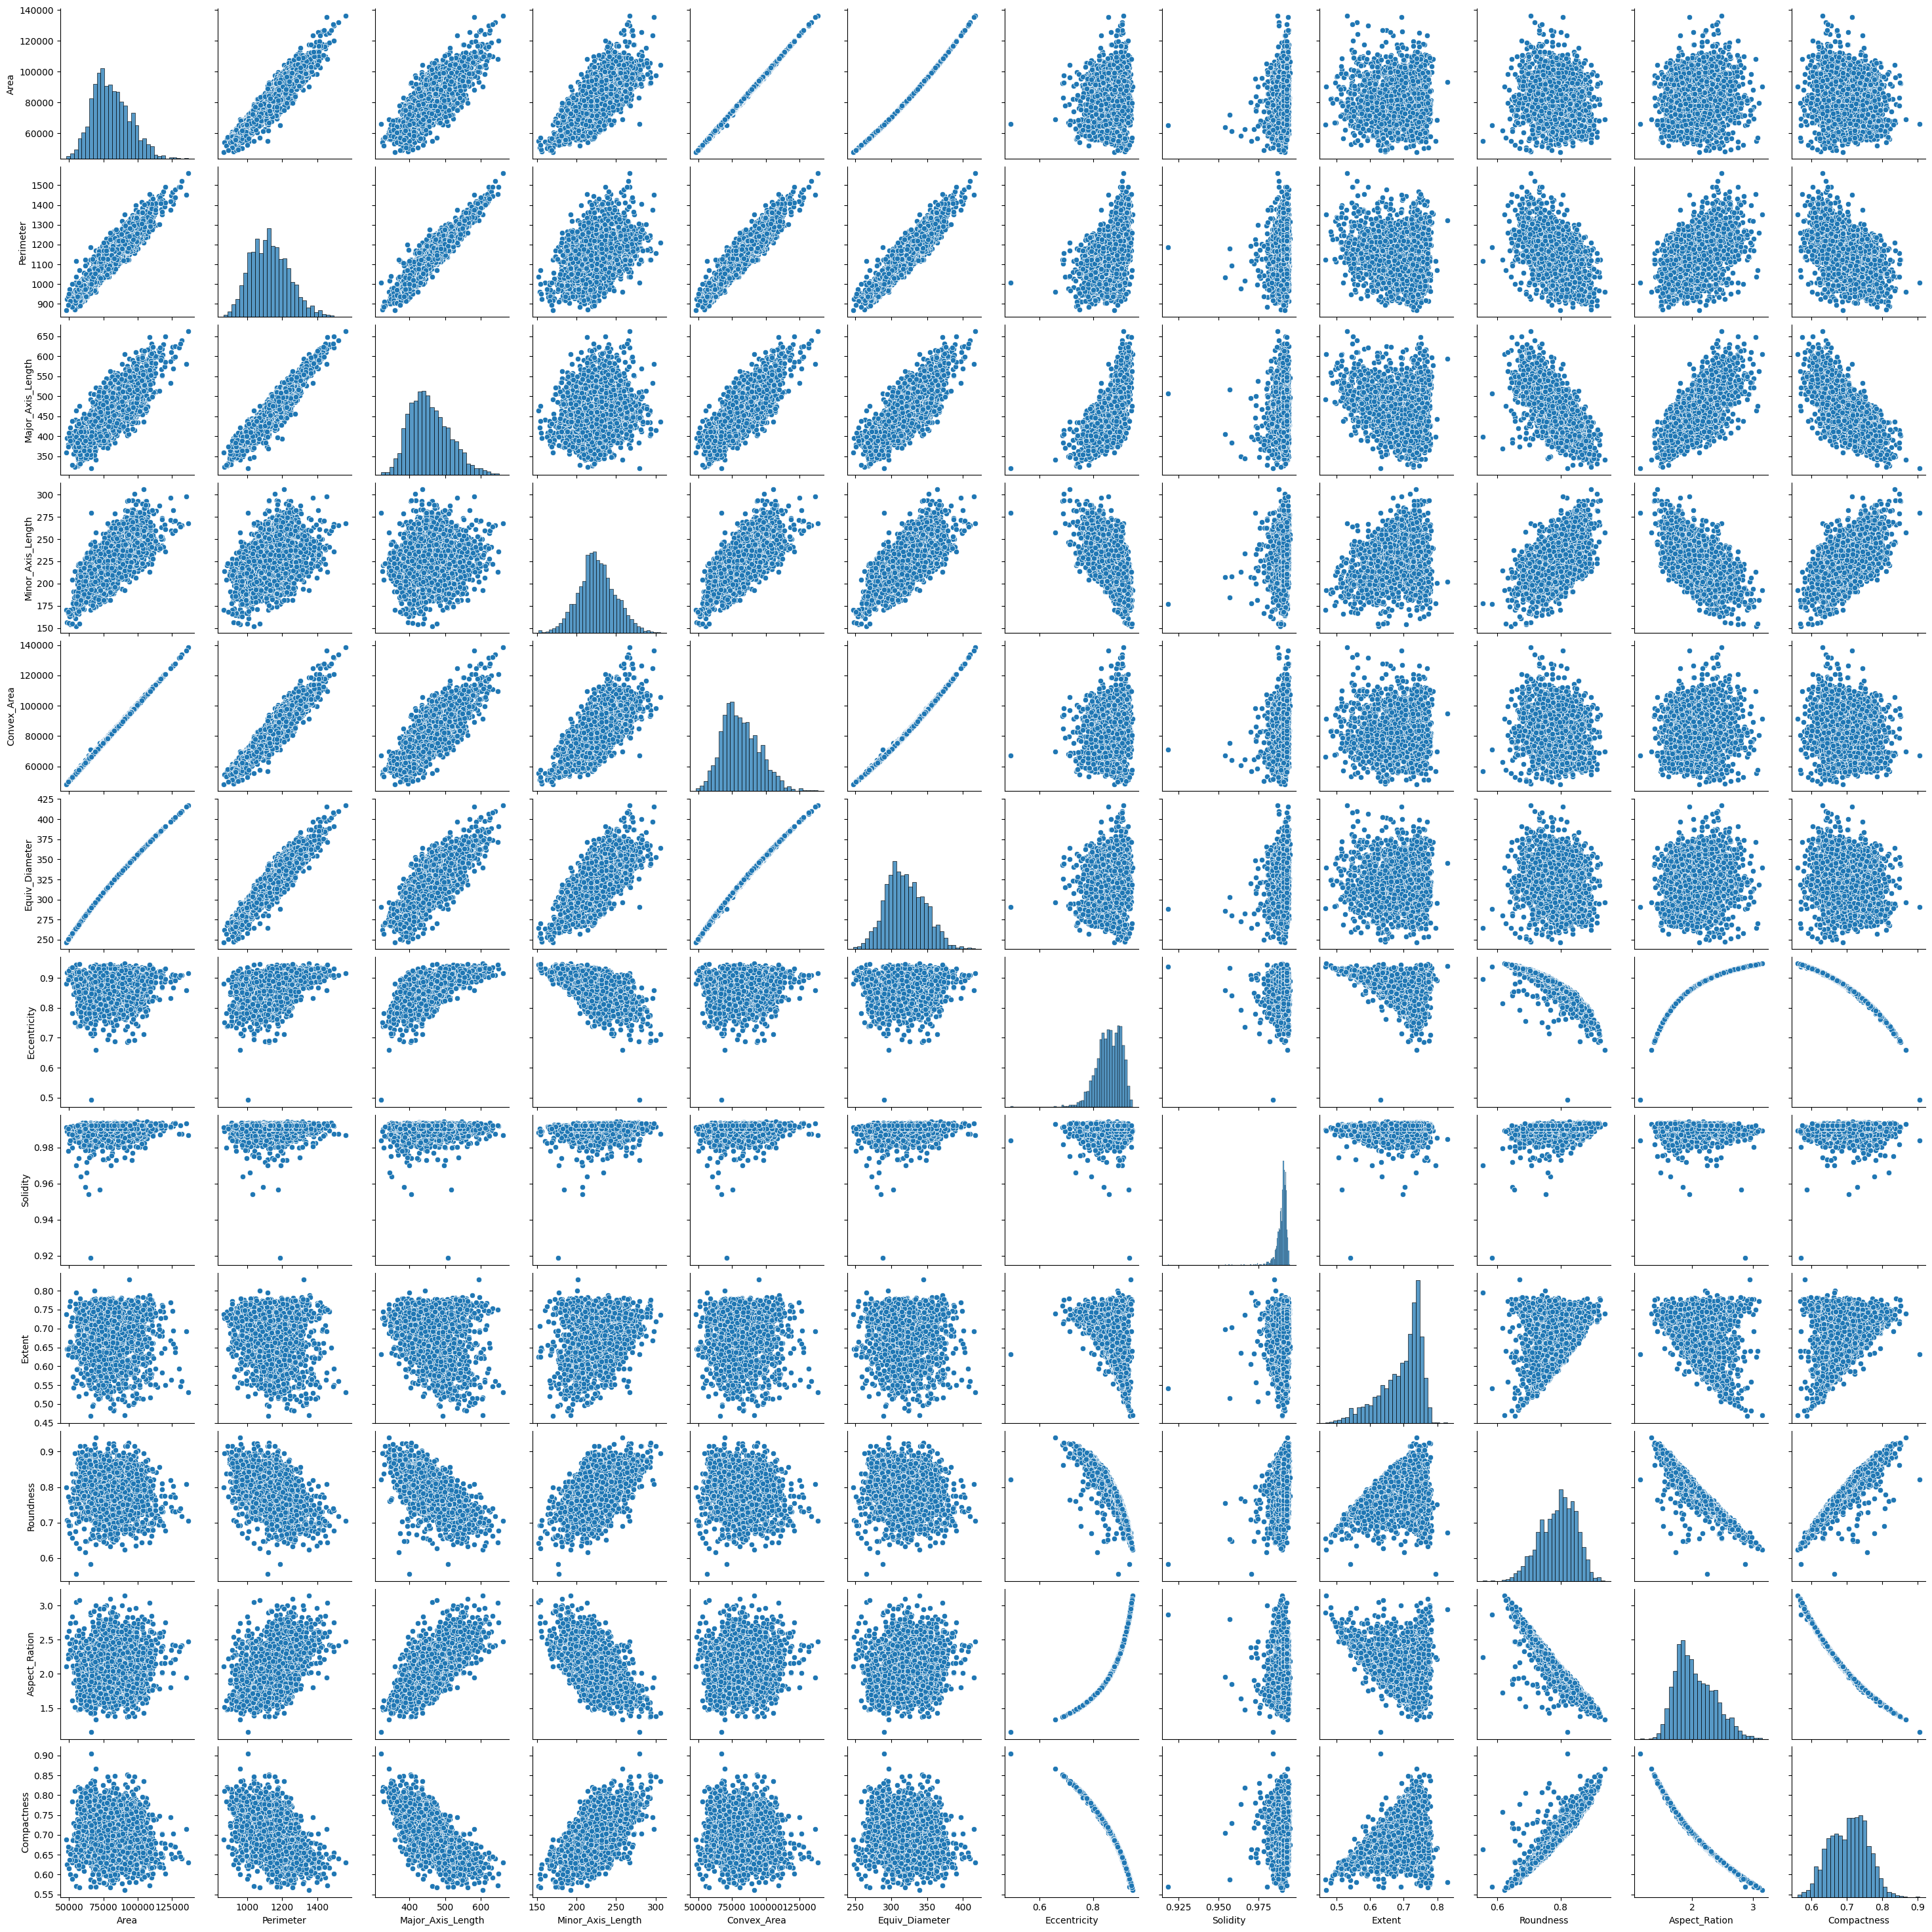

In [16]:
sns.pairplot(pumpkin)

# Random Forest

In [28]:
X = pumpkin.drop('Class', axis=1)
y = pumpkin['Class']

# this dataset only contains numerical features
numerical_pipeline = Pipeline([('std_scaler', StandardScaler()),('imputer', SimpleImputer(strategy='mean'))])

data_pipeline = ColumnTransformer([('categorical', numerical_pipeline, X.columns)])

# 20% out of bag test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# test out a range of max depths
for md in range(3,15,1):
    pipeline = Pipeline(steps=[('data_pipeline', data_pipeline),('rf', RandomForestClassifier(max_depth=md))])

    pipeline.fit(X_train, y_train)

    # evaluate the model on the out of bag test dataset
    y_pred = pipeline.predict(X_test)

    # metrics
    accuracy = round(accuracy_score(y_test, y_pred),4)
    precision = round(precision_score(y_test, y_pred, average='weighted'),4)
    recall = round(recall_score(y_test, y_pred, average='weighted'),4)
    print(f"Metrics for models with max depth = {md}")
    print(f"Accuracy: {accuracy} Precision: {precision} Recall: {recall}\n")

Metrics for models with max depth = 3
Accuracy: 0.882 Precision: 0.8828 Recall: 0.882

Metrics for models with max depth = 4
Accuracy: 0.892 Precision: 0.8927 Recall: 0.892

Metrics for models with max depth = 5
Accuracy: 0.888 Precision: 0.8884 Recall: 0.888

Metrics for models with max depth = 6
Accuracy: 0.894 Precision: 0.8952 Recall: 0.894

Metrics for models with max depth = 7
Accuracy: 0.892 Precision: 0.893 Recall: 0.892

Metrics for models with max depth = 8
Accuracy: 0.892 Precision: 0.893 Recall: 0.892

Metrics for models with max depth = 9
Accuracy: 0.892 Precision: 0.8921 Recall: 0.892

Metrics for models with max depth = 10
Accuracy: 0.88 Precision: 0.8804 Recall: 0.88

Metrics for models with max depth = 11
Accuracy: 0.884 Precision: 0.8841 Recall: 0.884

Metrics for models with max depth = 12
Accuracy: 0.882 Precision: 0.8825 Recall: 0.882

Metrics for models with max depth = 13
Accuracy: 0.888 Precision: 0.8881 Recall: 0.888

Metrics for models with max depth = 14
Accu

# Support Vector Classifier

In [9]:
from sklearn.svm import SVC  

pipeline = Pipeline(steps=[('data_pipeline', data_pipeline),('clf', SVC())])

pipeline.fit(X_train, y_train)

# evaluate the model on the out of bag test dataset
y_pred = pipeline.predict(X_test)

# metrics
accuracy = round(accuracy_score(y_test, y_pred),4)
precision = round(precision_score(y_test, y_pred, average='weighted'),4)
recall = round(recall_score(y_test, y_pred, average='weighted'),4)
print(f"Accuracy: {accuracy} Precision: {precision} Recall: {recall}")

Pipeline(steps=[('data_pipeline',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler()),
                                                                  ('imputer',
                                                                   SimpleImputer())]),
                                                  Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness'],
      dtype='object'))])),
                ('clf', SVC())])

Accuracy: 0.8853 Precision: 0.8871 Recall: 0.8853
